In [1]:
import glob
import nibabel as nb

In [2]:
subj_idx = '01'

In [5]:
import scipy as sp
from scipy import ndimage

In [ ]:
sns.set_context('poster')

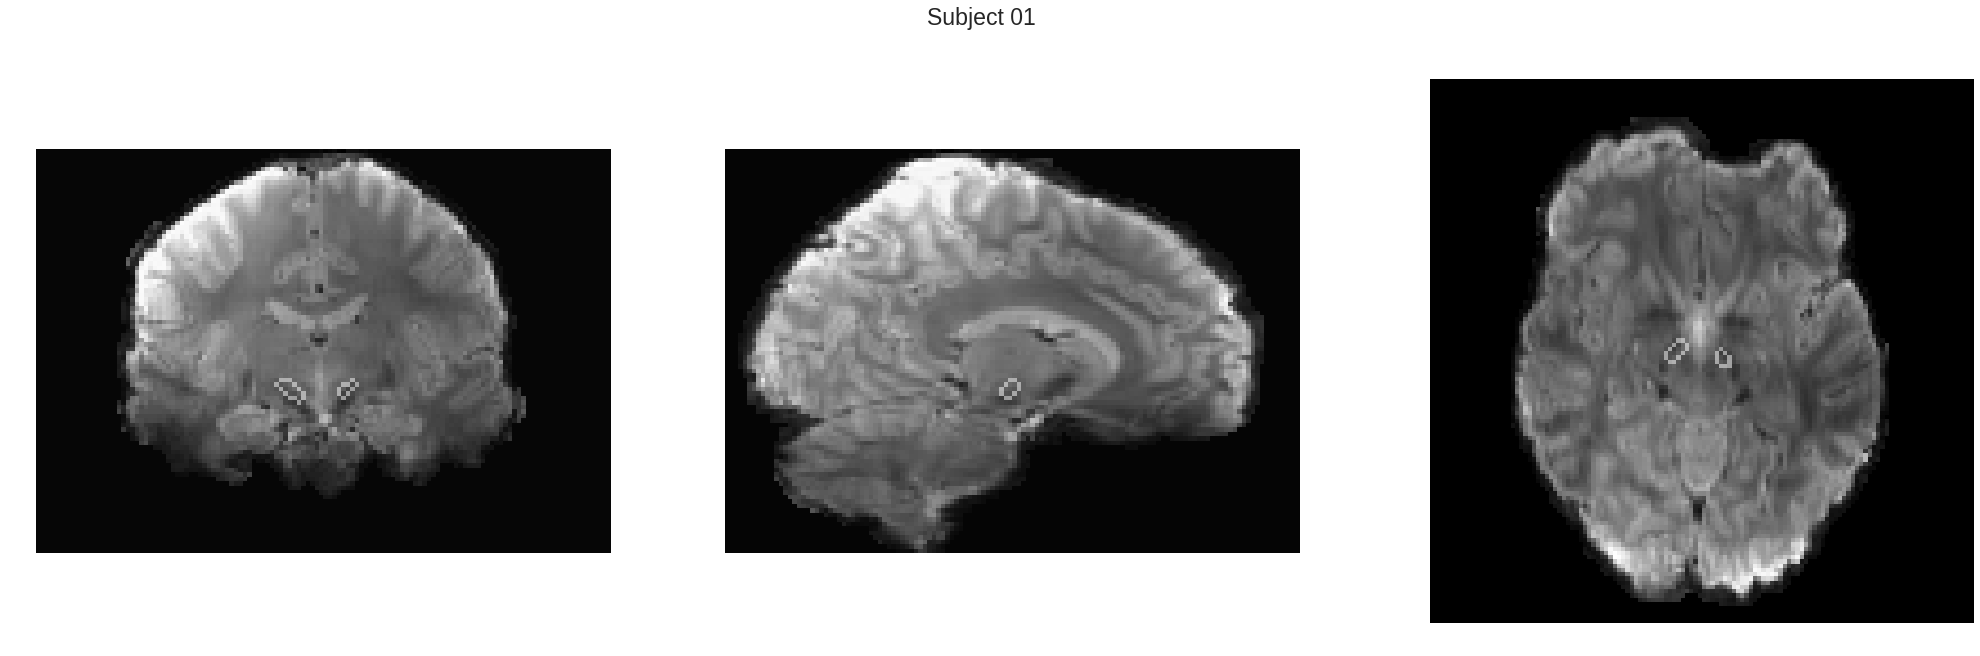

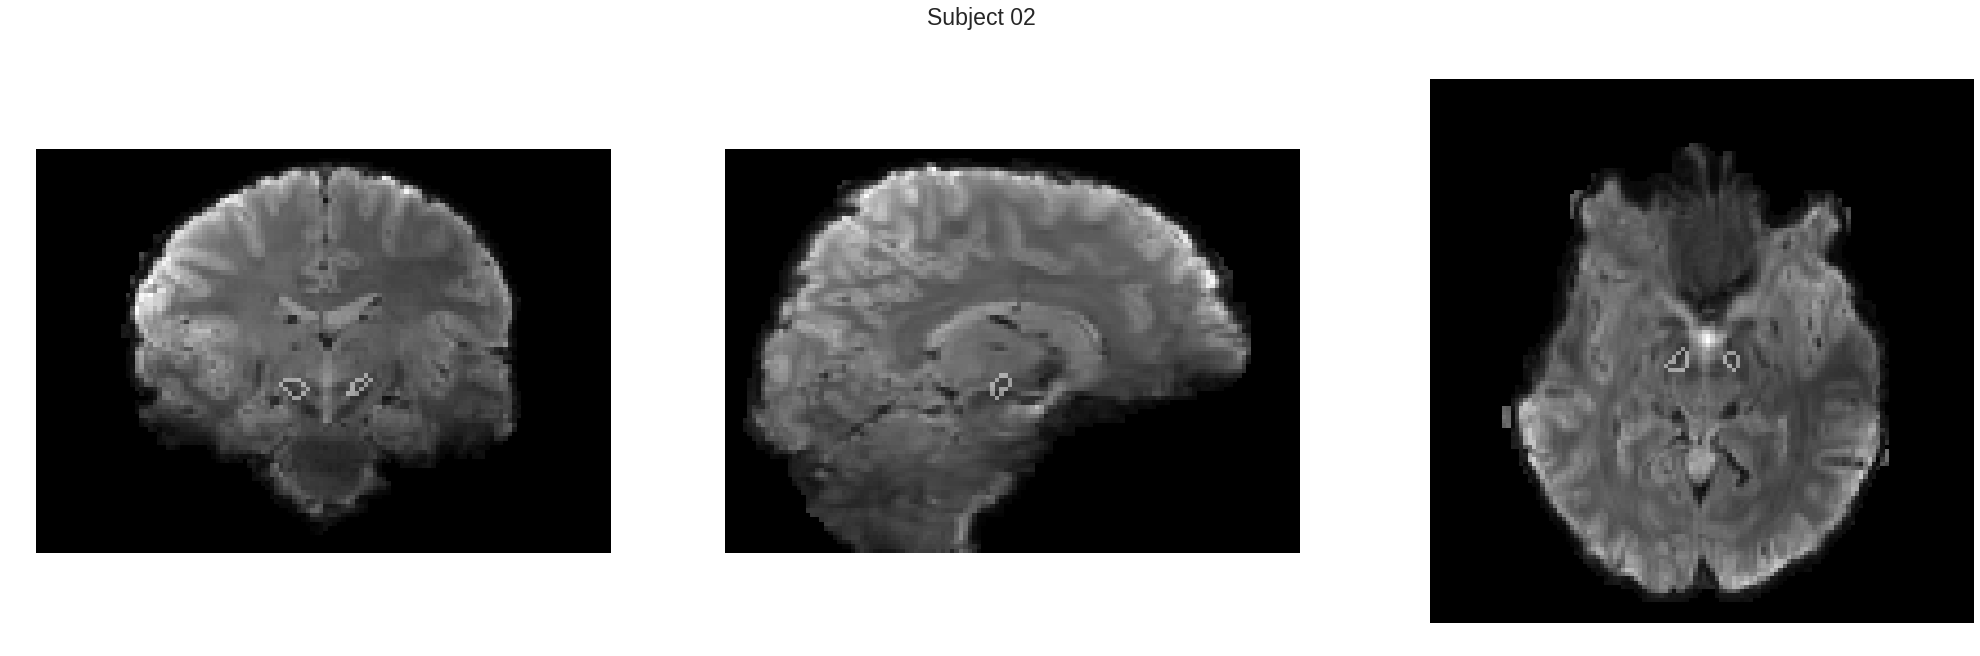

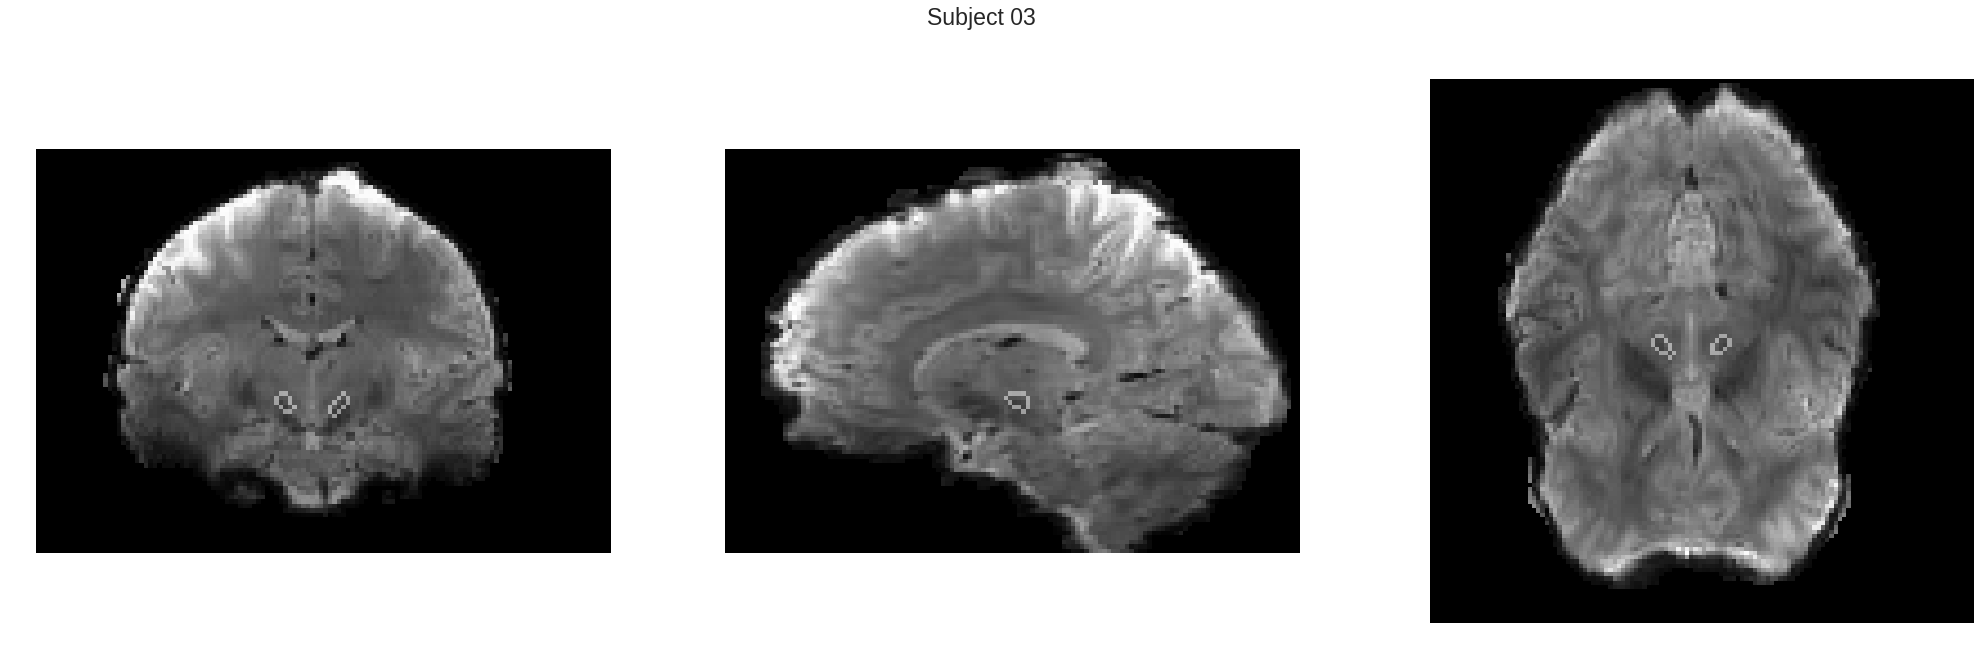

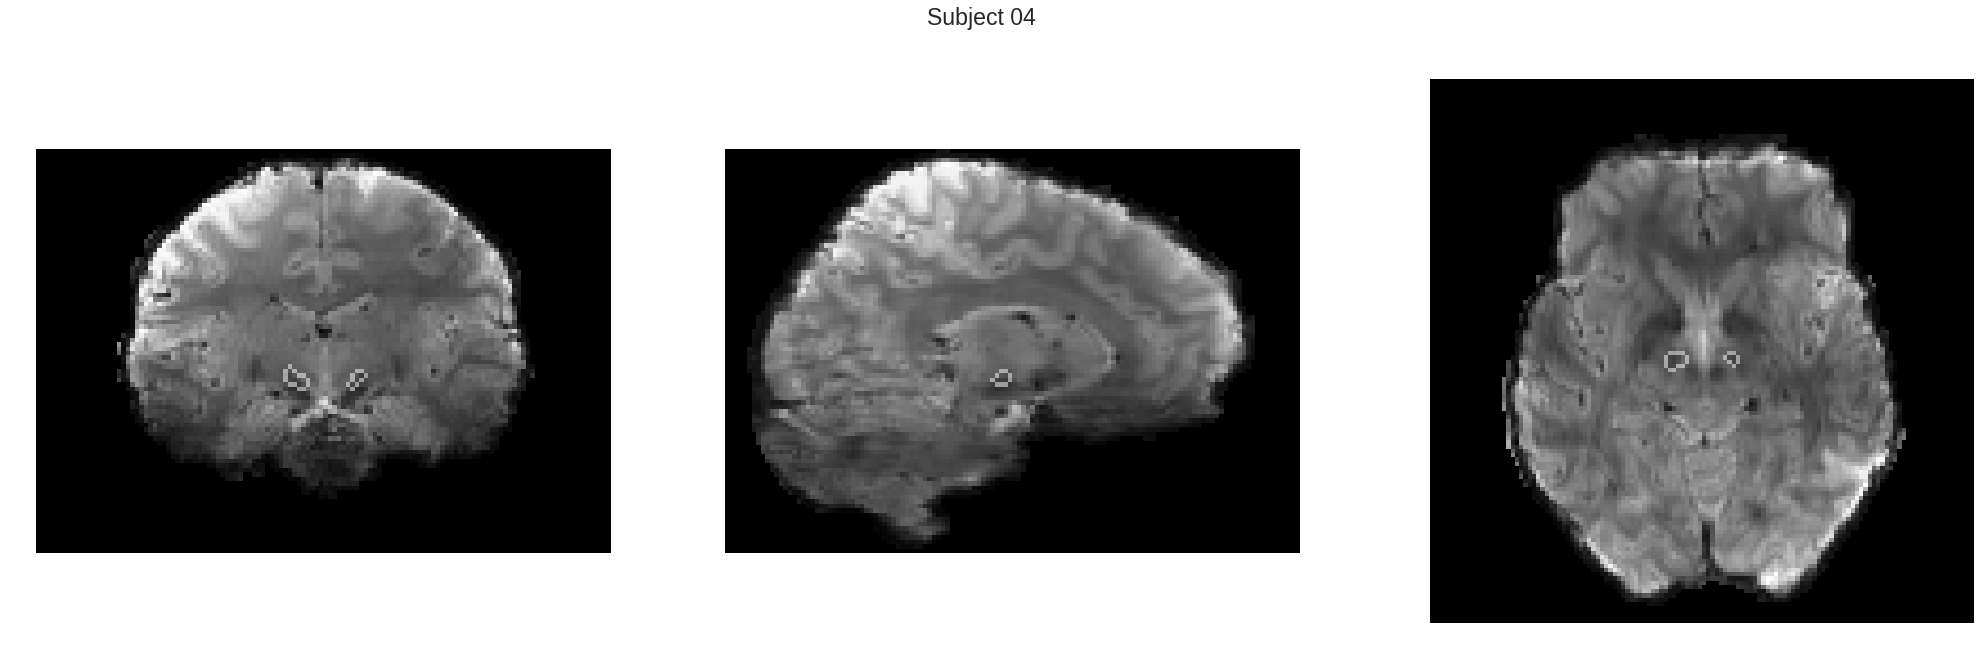

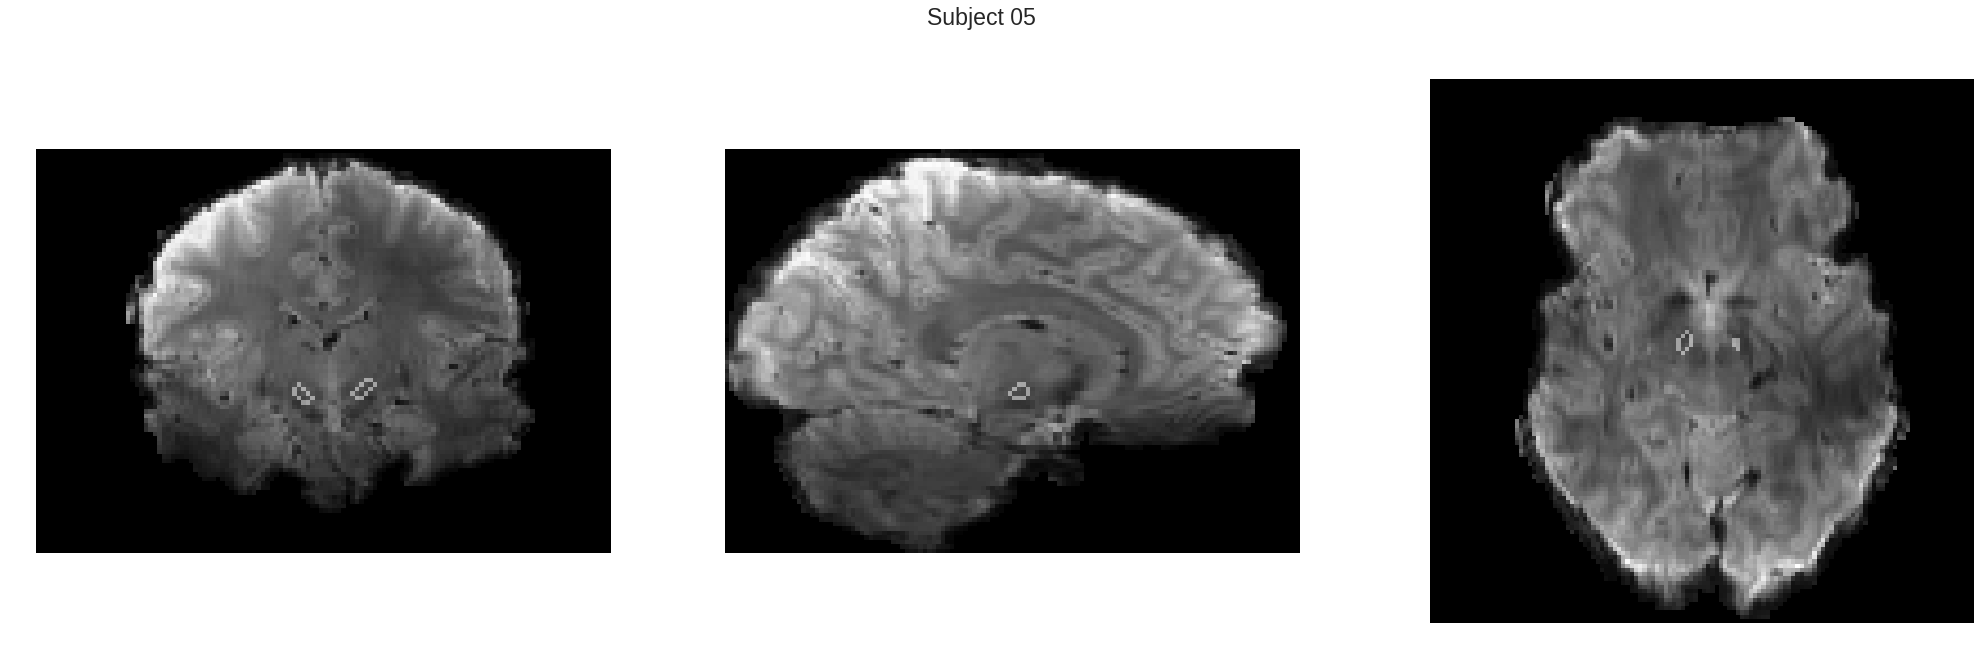

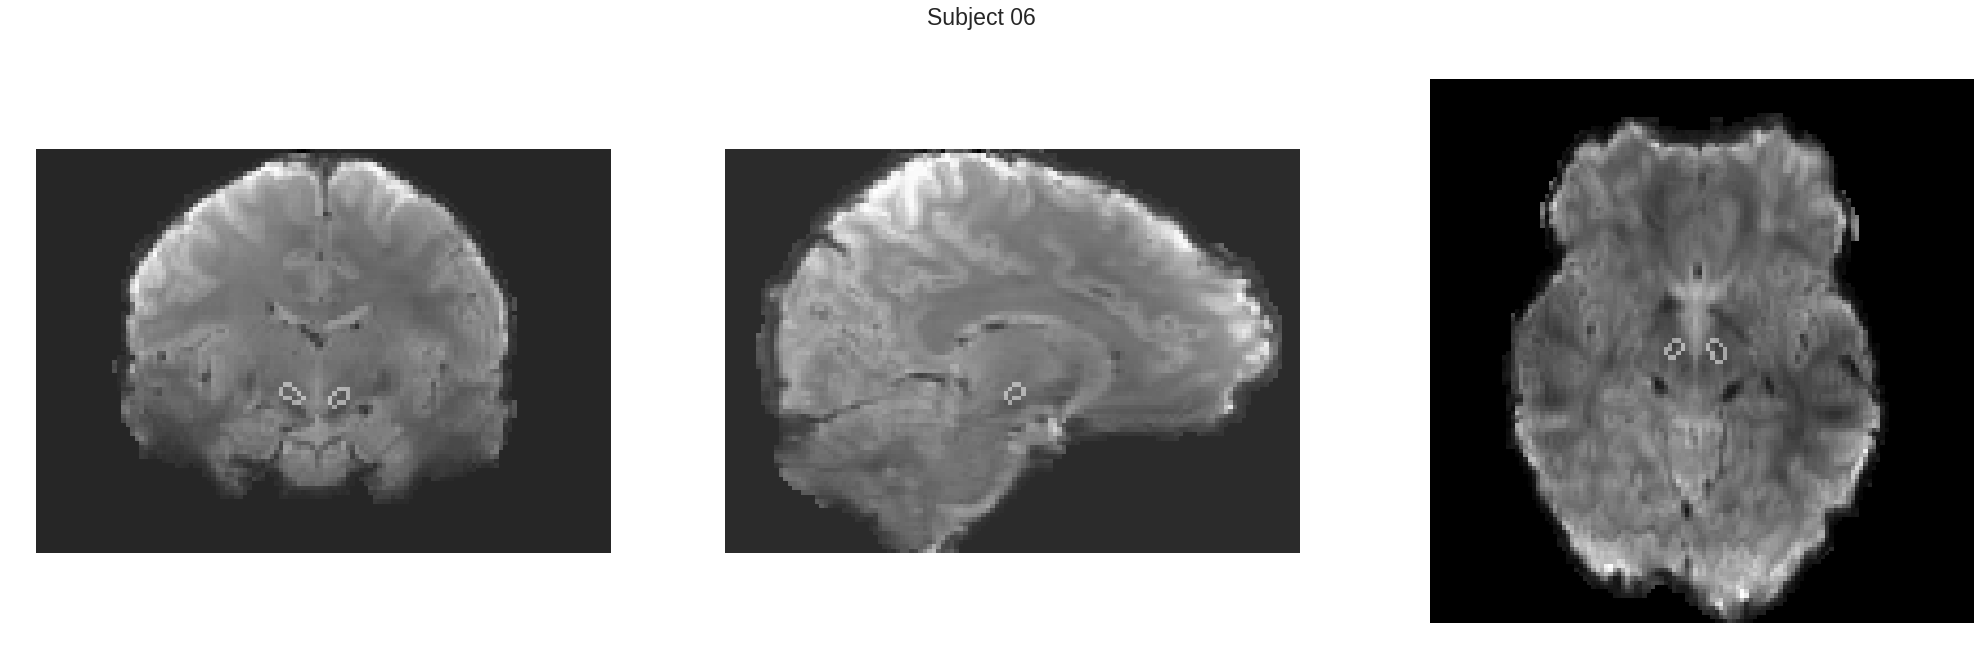

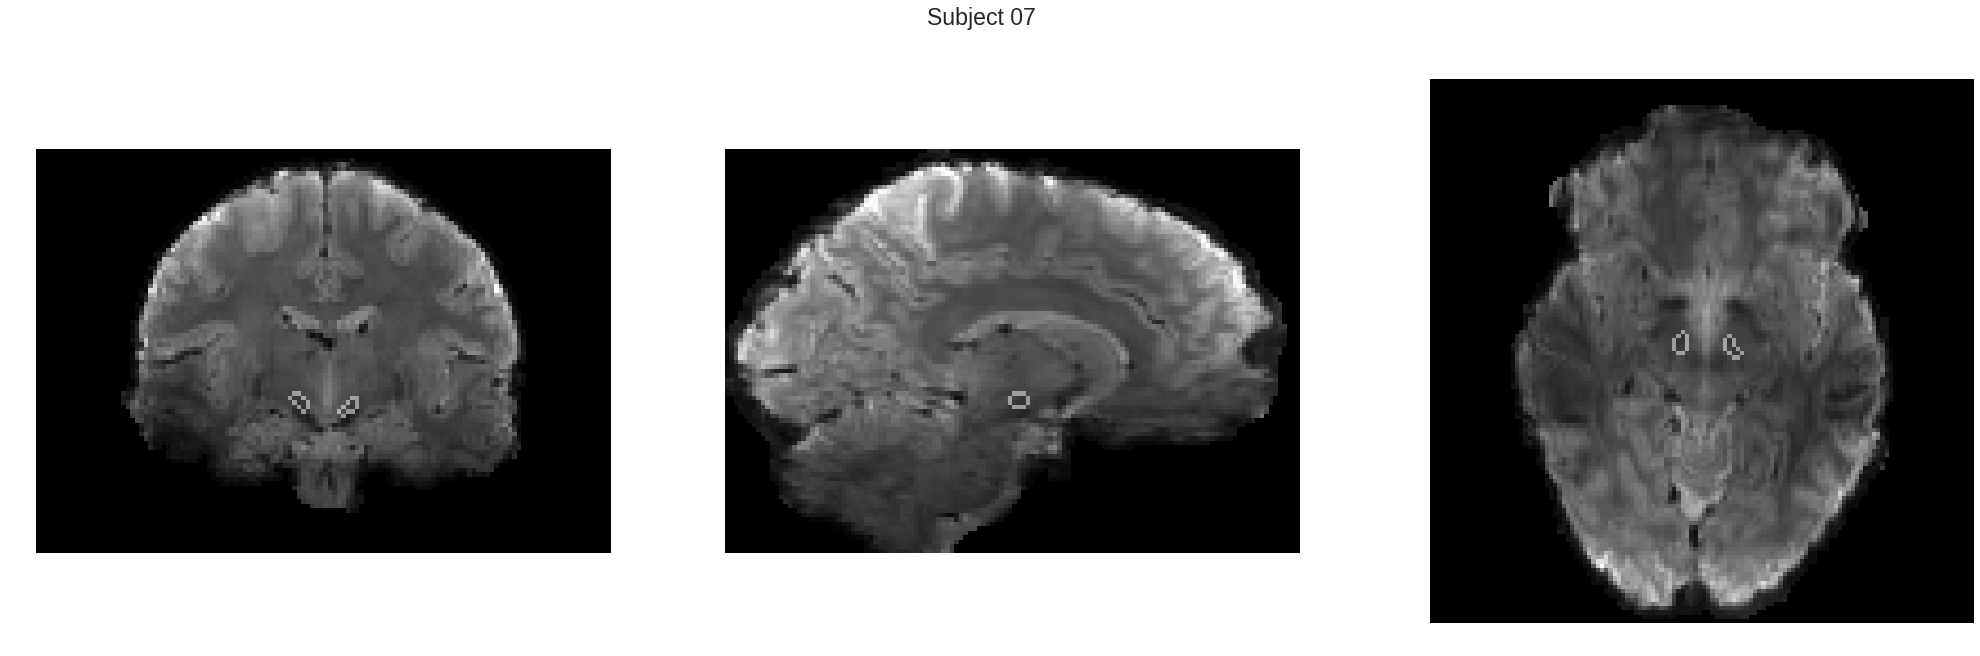

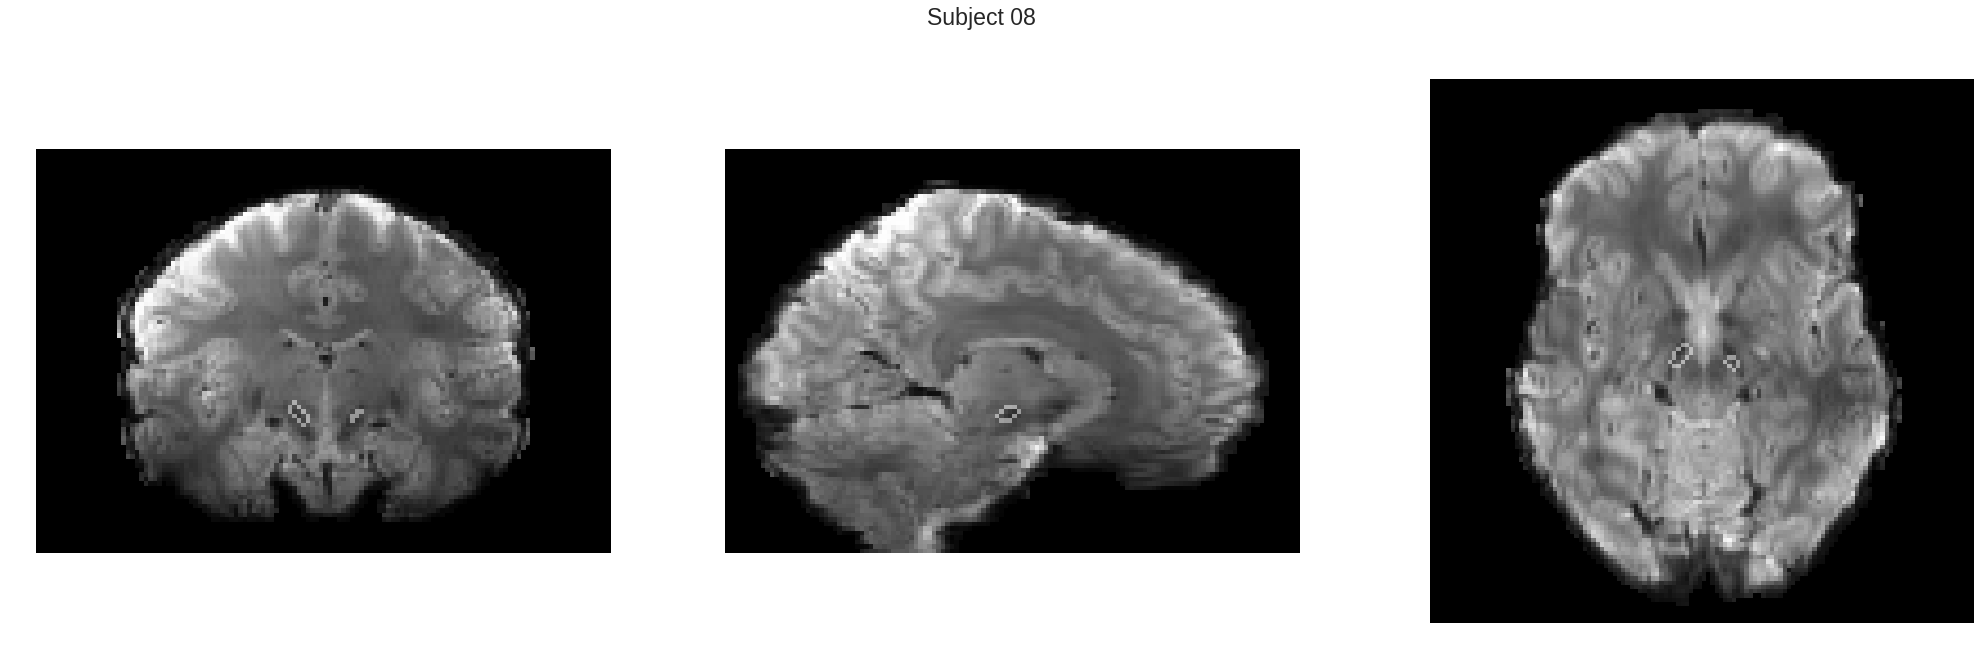

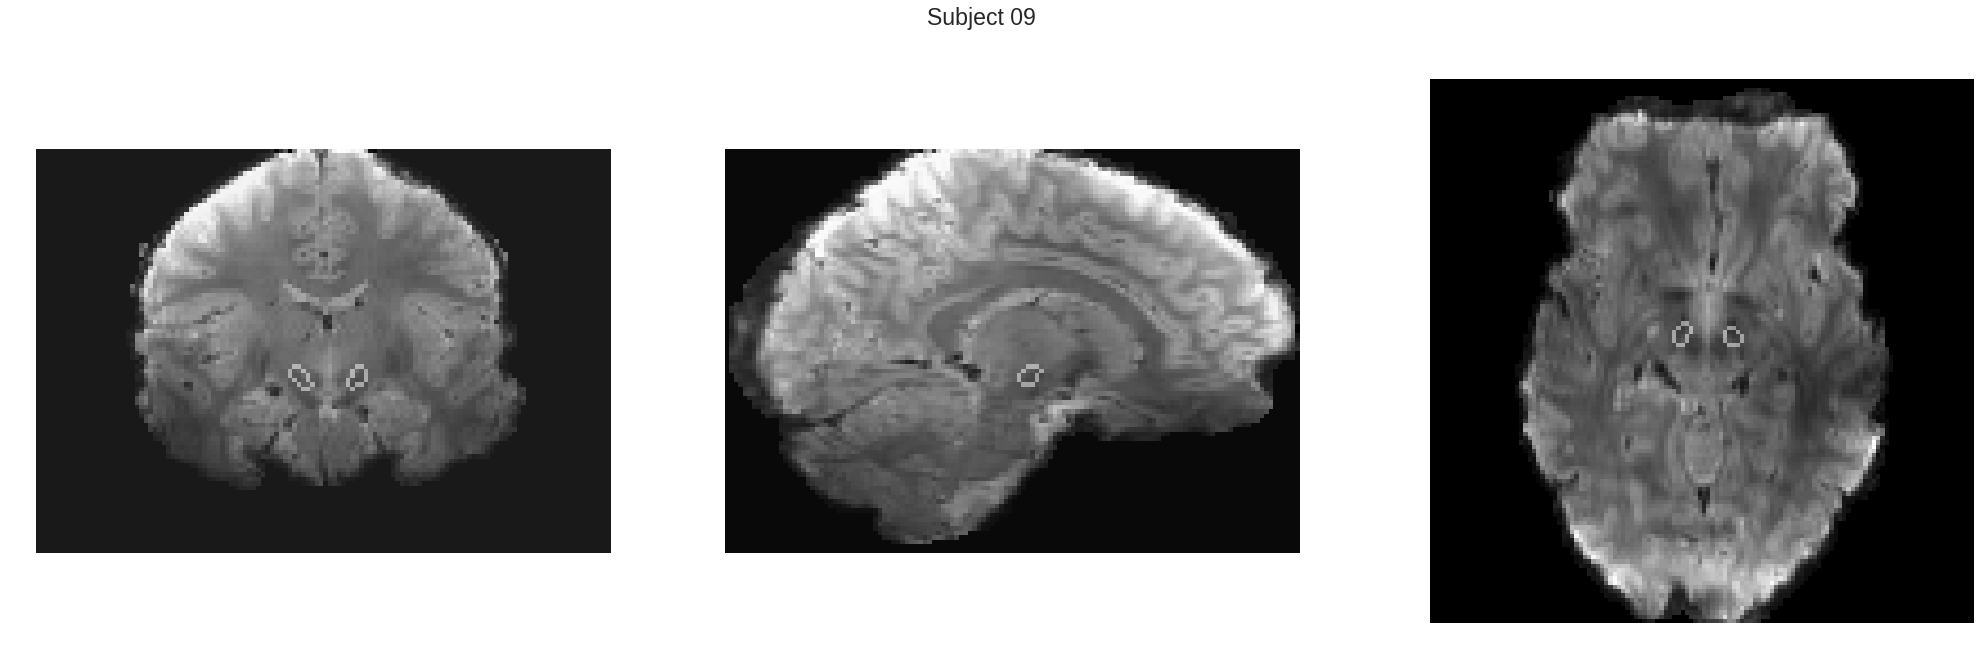

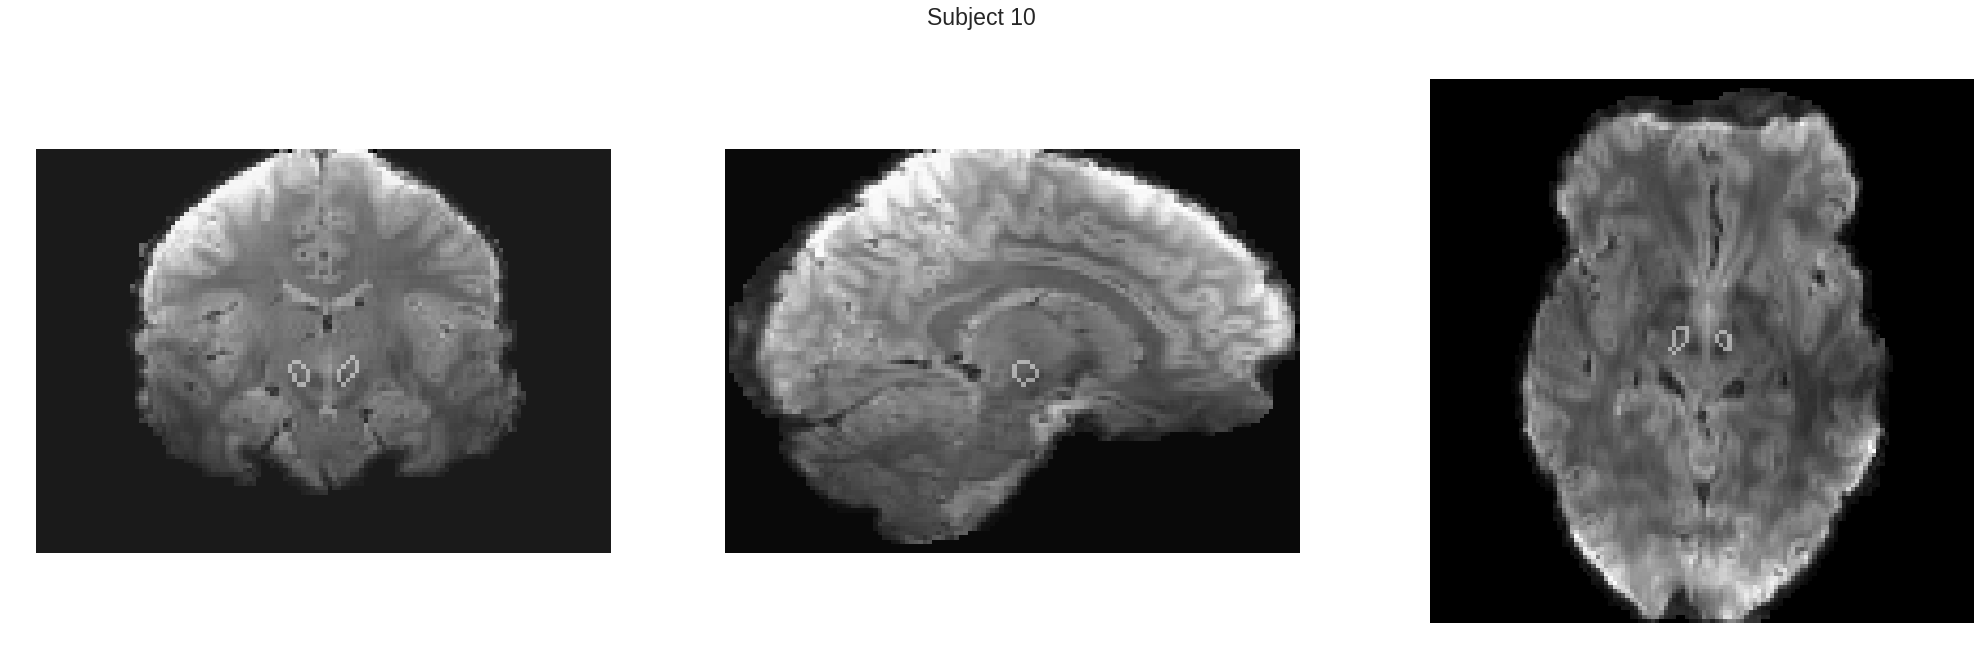

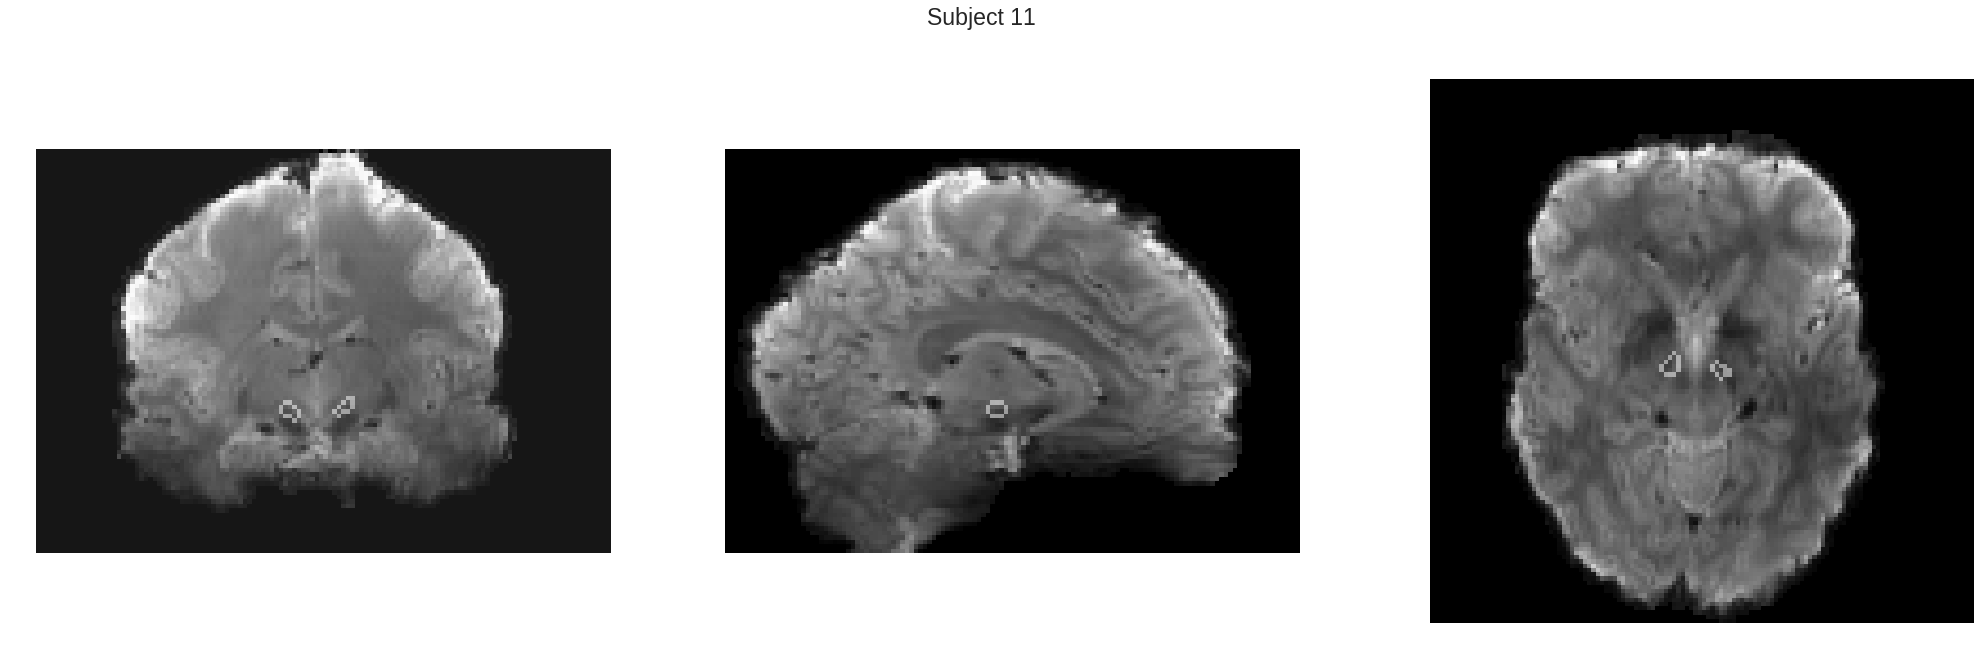

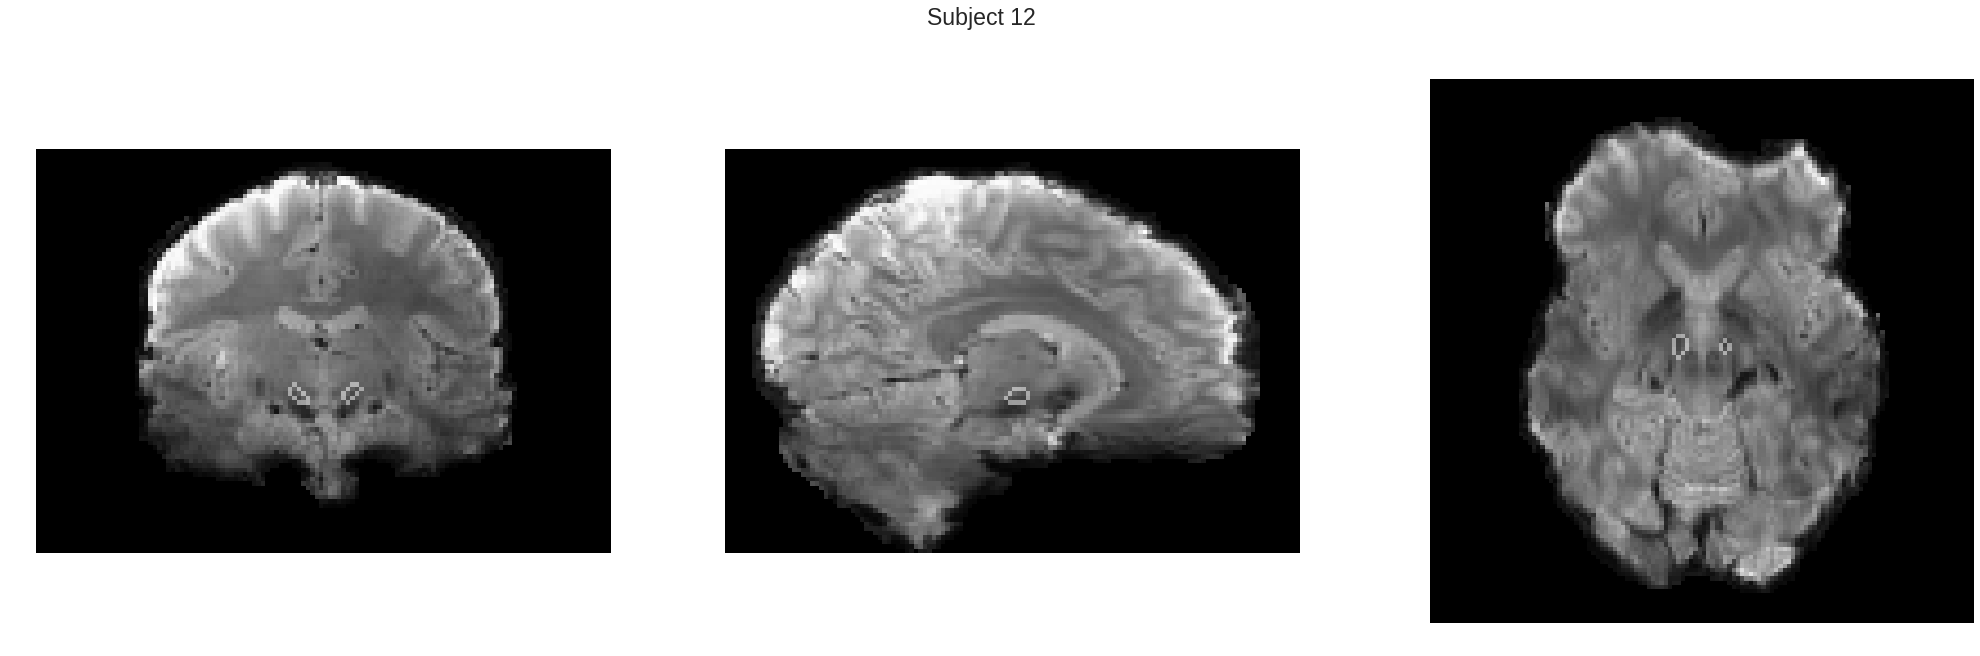

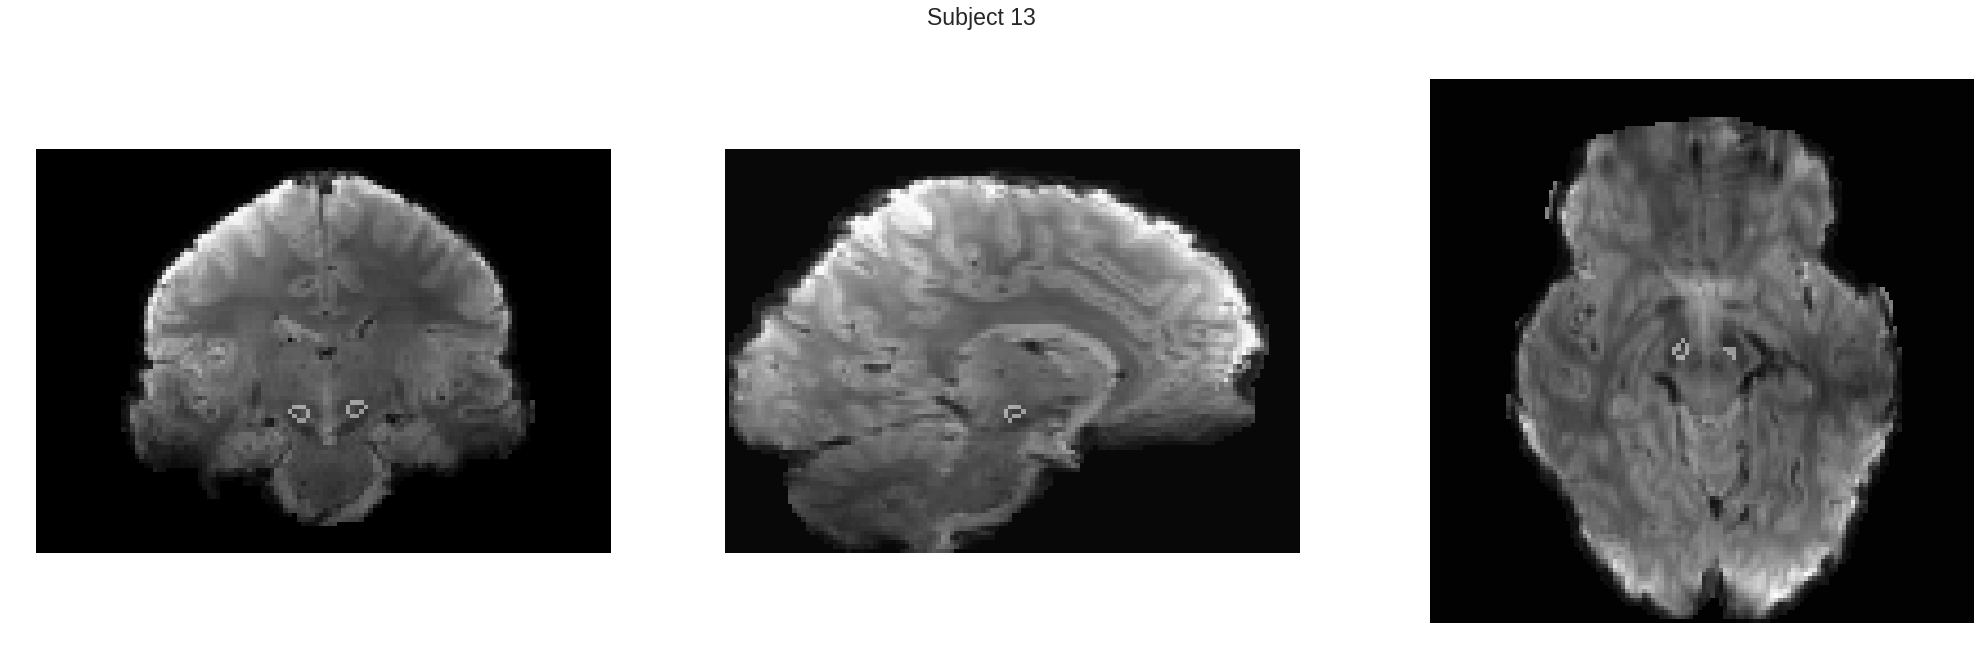

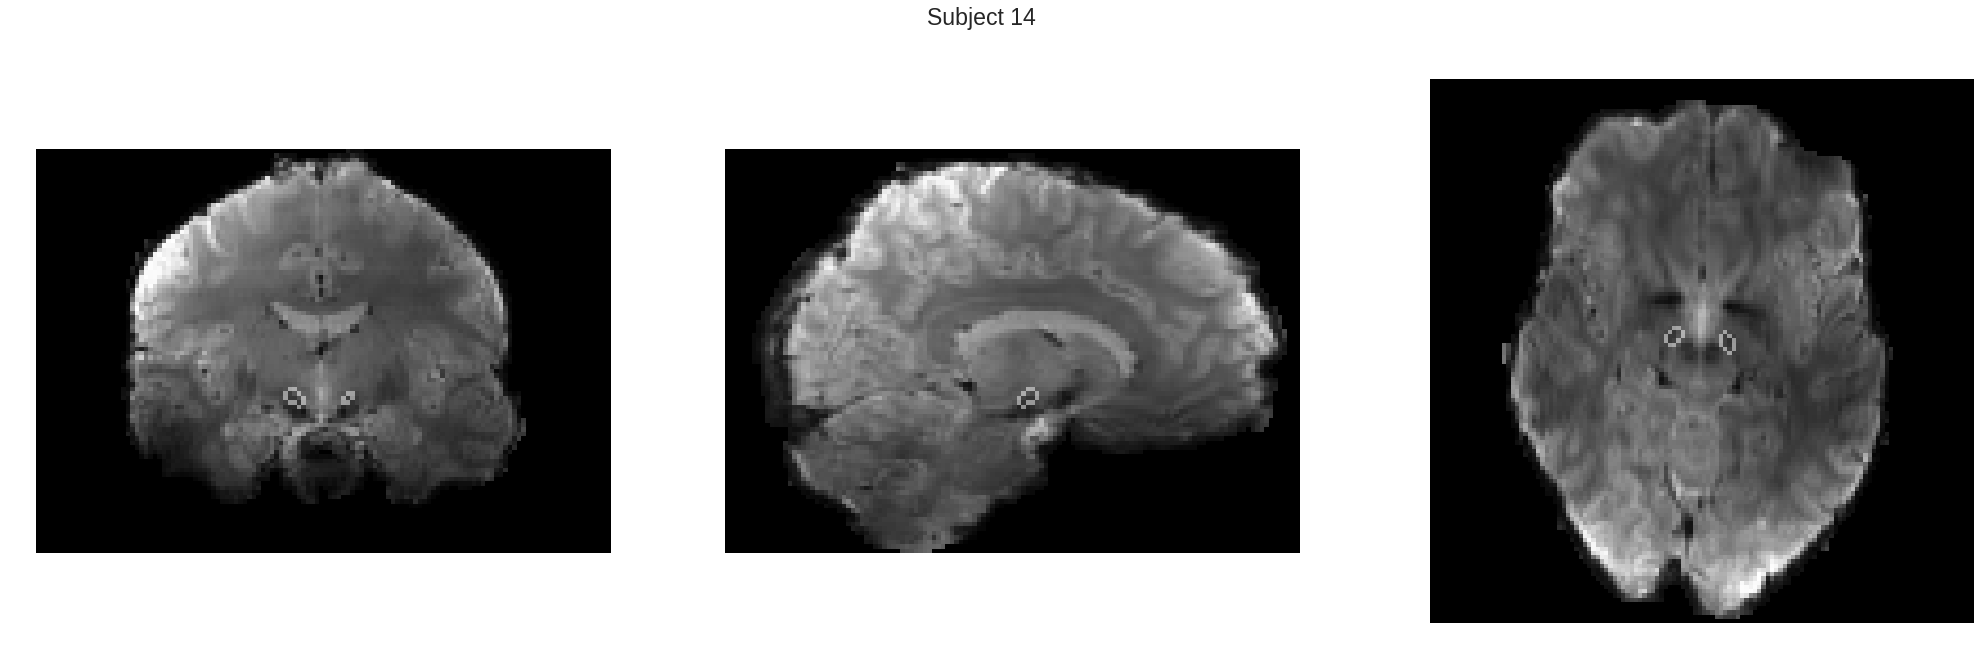

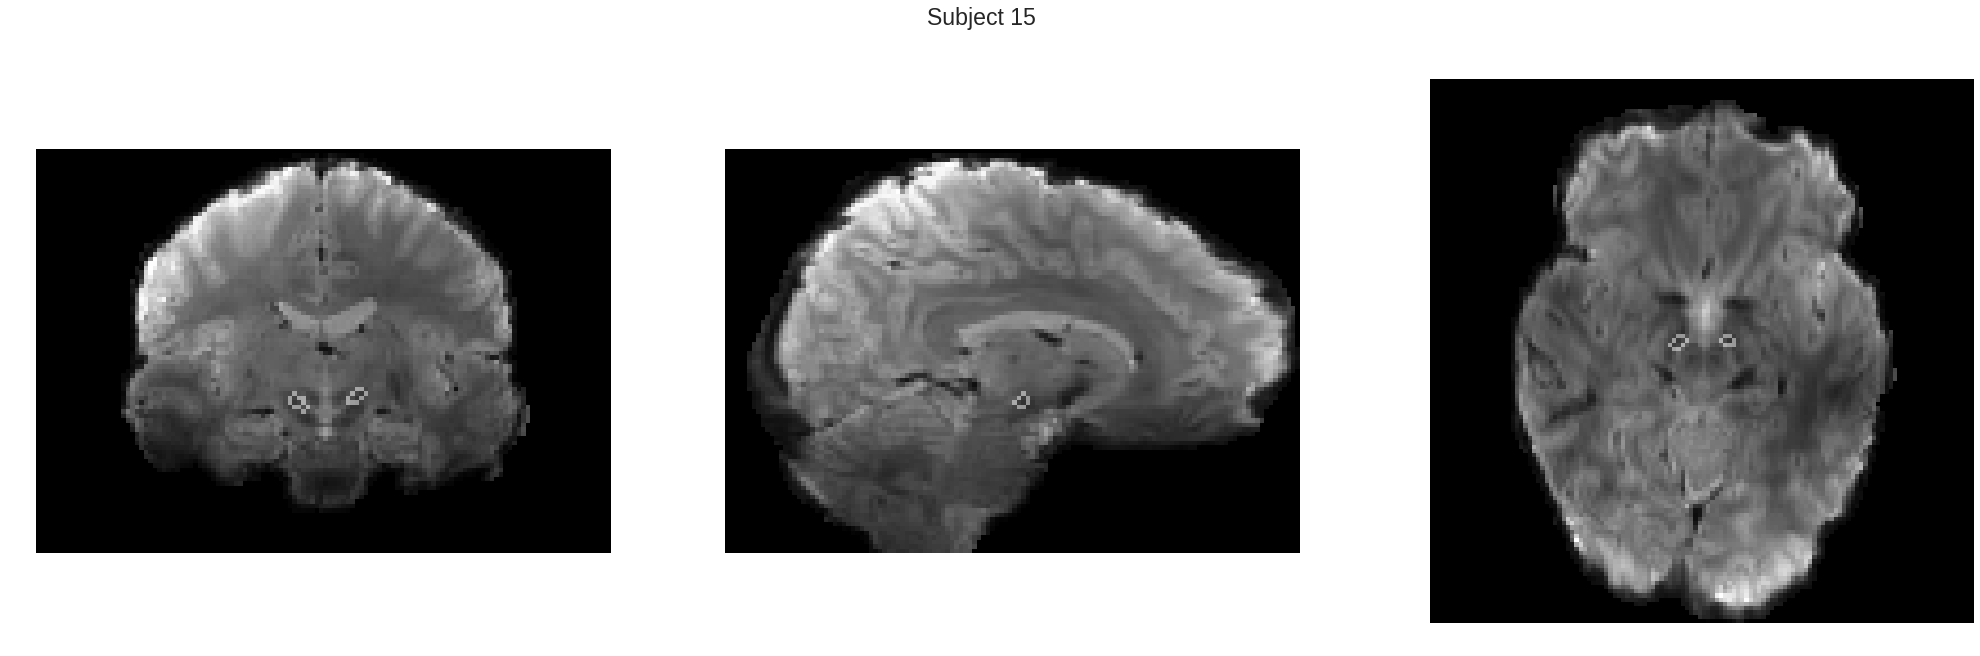

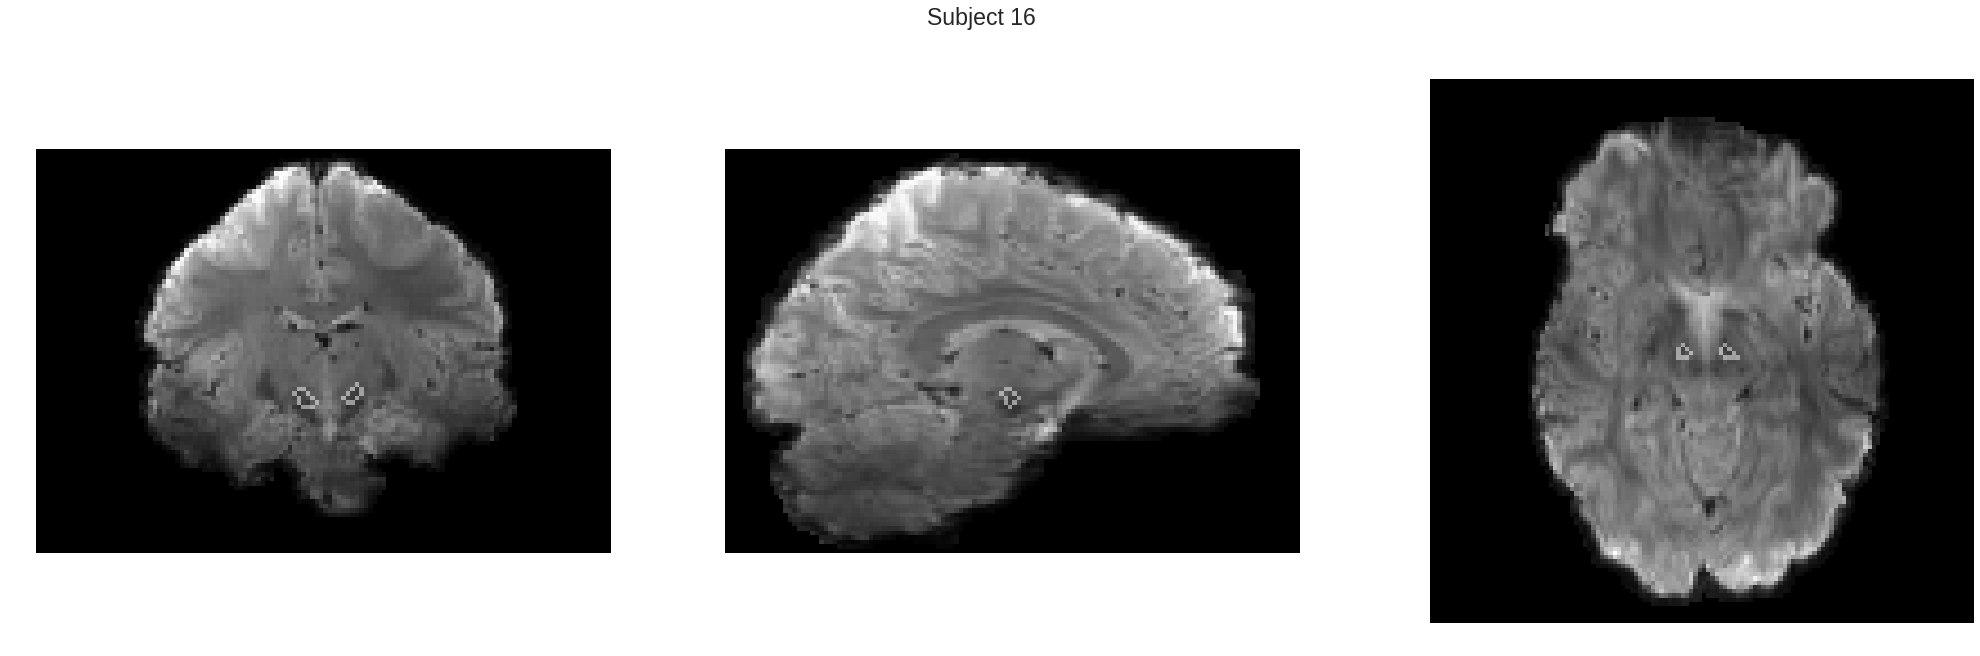

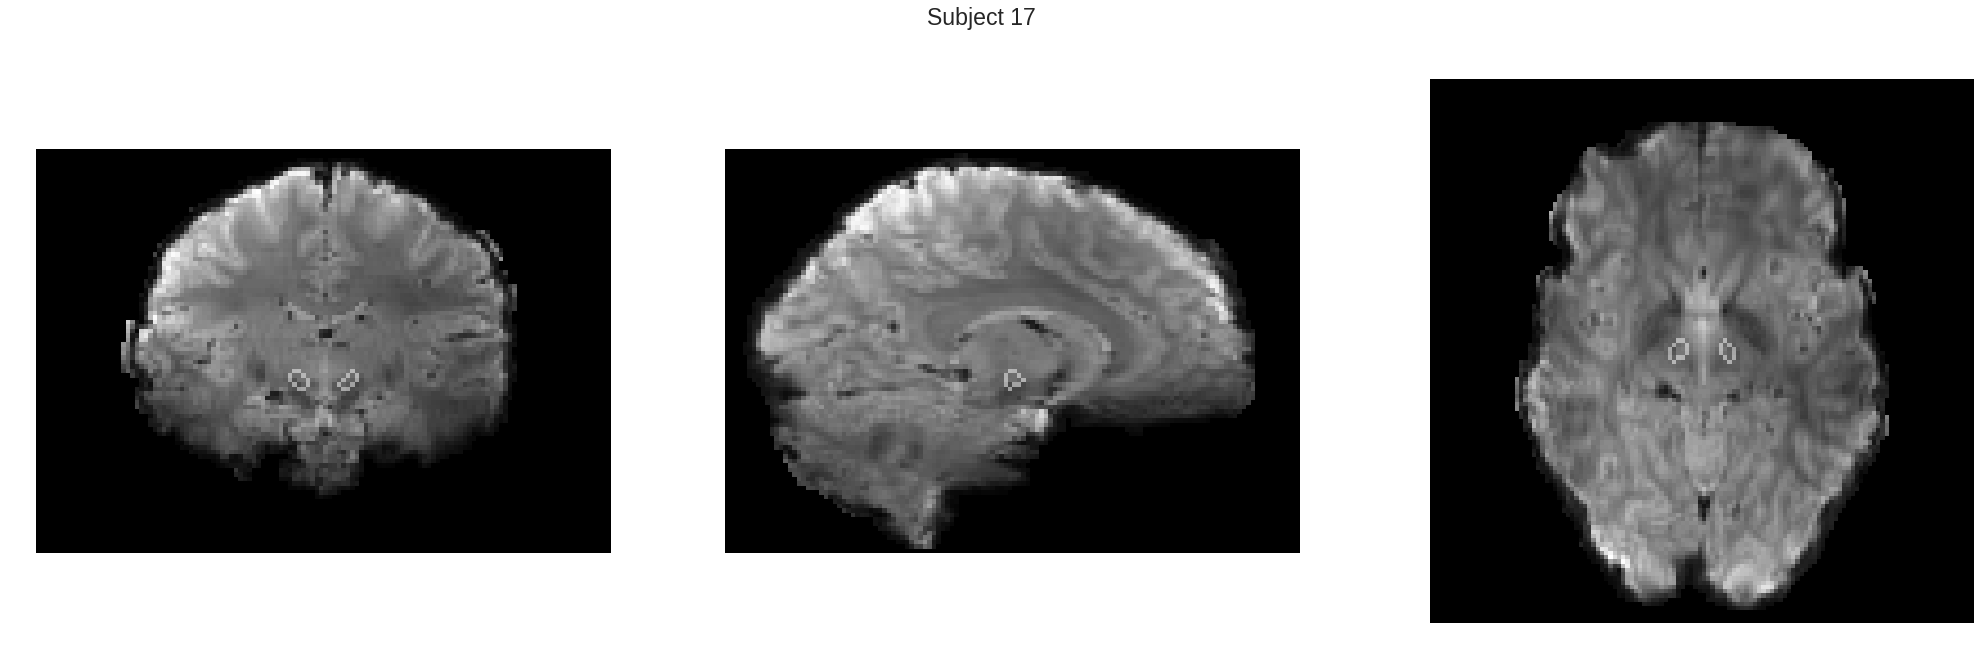

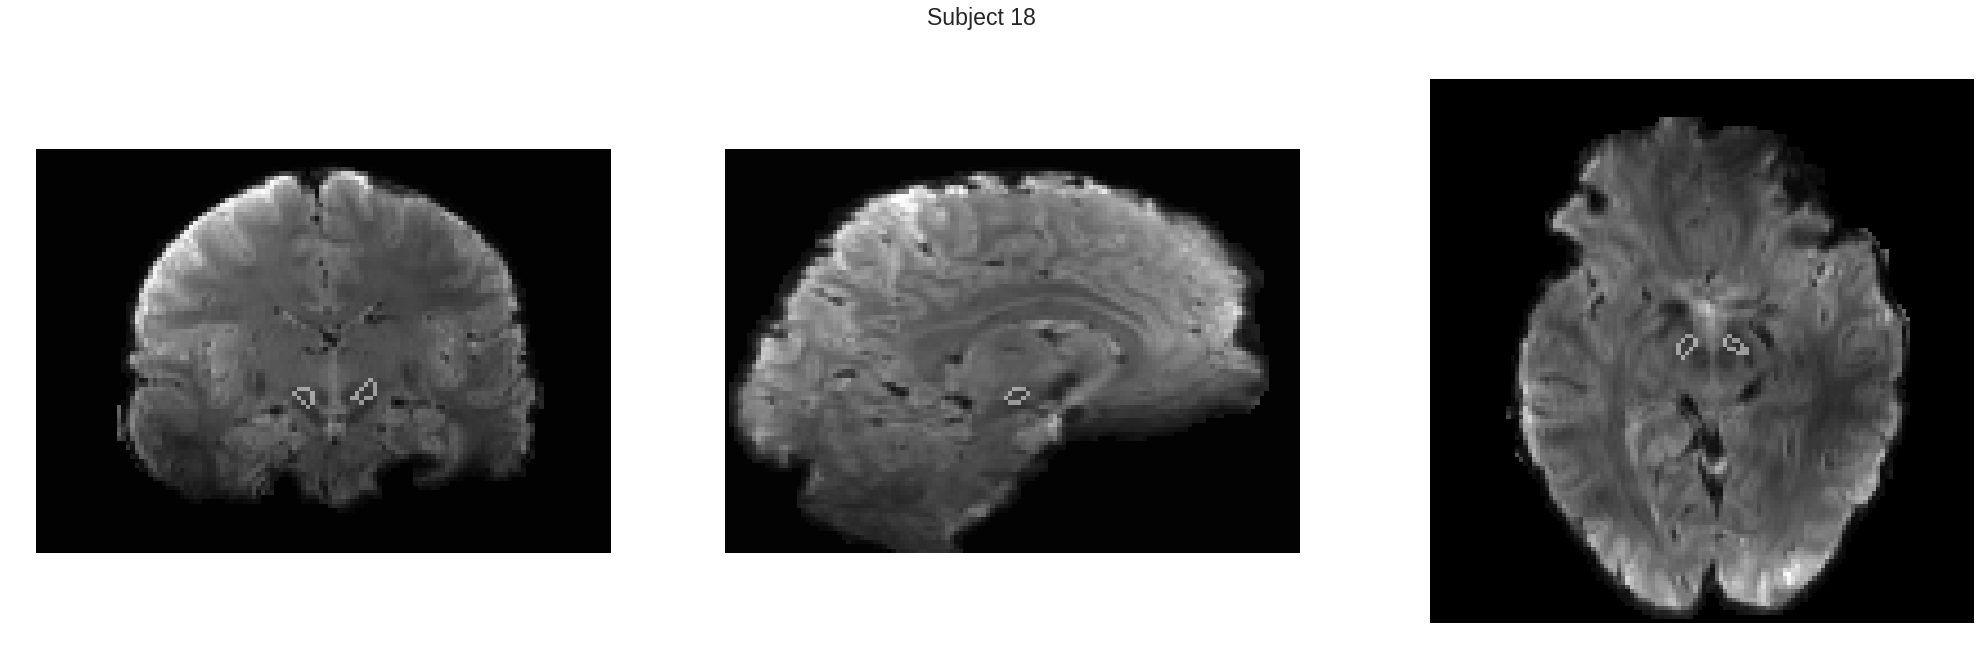

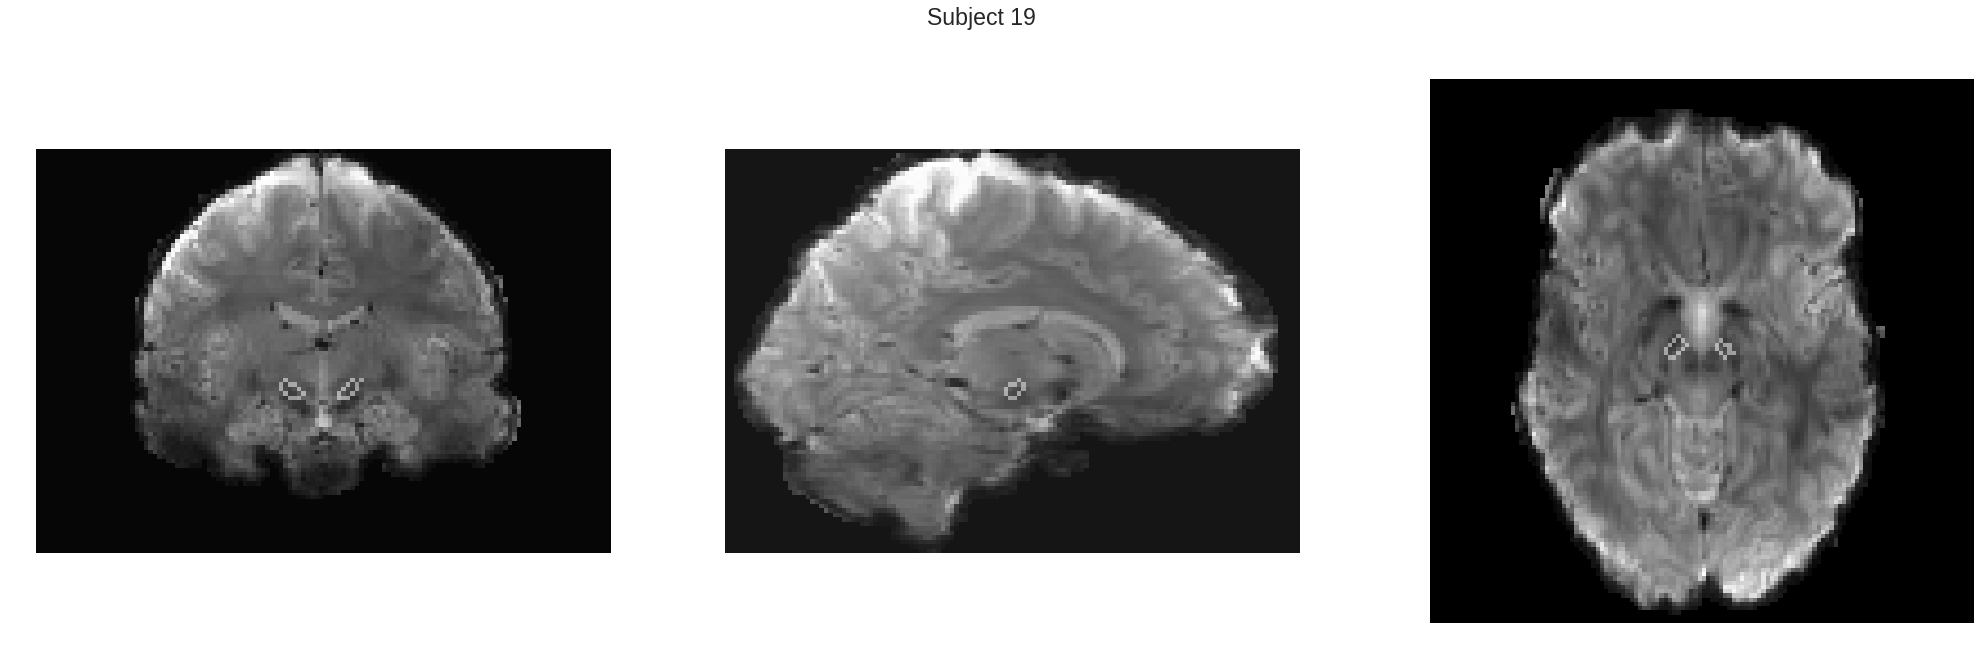

In [41]:

for subj_idx in ['%02d' % i for i in xrange(1, 20)]:
    mean_epi = nb.load('/home/gdholla1/projects/bias/data/processed/feat_preprocess/mean/_subject_id_{subj_idx}/_fwhm_0.0/sub-{subj_idx}_task-randomdotmotion_run-01_bold_unwarped_st_dtype_mcf_mask_gms_mean.nii.gz'.format(**locals()))

    left_stn = nb.load('/home/gdholla1/projects/bias/data/derivatives/sub-{subj_idx}/masks/epi_space/sub-{subj_idx}_mask-STh_L_trans.nii.gz'.format(**locals()))
    right_stn = nb.load('/home/gdholla1/projects/bias/data/derivatives/sub-{subj_idx}/masks/epi_space/sub-{subj_idx}_mask-STh_R_trans.nii.gz'.format(**locals()))



    com = ndimage.center_of_mass(right_stn.get_data())
    plt.figure(figsize=(35, 10))
    plt.subplot(131)

    plt.imshow(mean_epi.get_data()[:, int(com[1]), :].T, origin='lower', cmap=plt.cm.gray)
    plt.axis('off')


    left_stn = np.ma.masked_equal(ndimage.binary_dilation(left_stn.get_data()) - left_stn.get_data(), 0)
    plt.imshow(left_stn[:, int(com[1]), :].T, origin='lower', cmap=plt.cm.gray, vmin=0, vmax=1, alpha=0.5)

    right_stn = np.ma.masked_equal(ndimage.binary_dilation(right_stn.get_data()) - right_stn.get_data(), 0)
    plt.imshow(right_stn[:, int(com[1]), :].T, origin='lower', cmap=plt.cm.gray, vmin=0, vmax=1, alpha=0.5)

    plt.subplot(132)
    plt.imshow(mean_epi.get_data()[int(com[0]),  :, :].T, origin='lower', cmap=plt.cm.gray)
    plt.axis('off')

    plt.imshow(left_stn[int(com[0]), :].T, origin='lower', cmap=plt.cm.gray, vmin=0, vmax=1, alpha=0.5)
    plt.imshow(right_stn[int(com[0]), :].T, origin='lower', cmap=plt.cm.gray, vmin=0, vmax=1, alpha=0.5)

    plt.subplot(133)
    plt.imshow(mean_epi.get_data()[..., int(com[2])].T, origin='lower', cmap=plt.cm.gray)
    plt.axis('off')

    plt.imshow(left_stn[..., int(com[2])].T, origin='lower', cmap=plt.cm.gray, vmin=0, vmax=1, alpha=0.5)
    plt.imshow(right_stn[..., int(com[2])].T, origin='lower', cmap=plt.cm.gray, vmin=0, vmax=1, alpha=0.5)
    
    plt.suptitle('Subject %s' % subj_idx)